In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("datamining_new.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[  13 7820]
 [  10 5000]
 [  20 4000]
 [   9 4520]
 [  15 5500]
 [   8 5460]
 [  10 3000]
 [  10 7000]
 [   5 4160]
 [   3 4452]
 [   6 5601]
 [  11 5420]
 [  13 7840]
 [   5 5360]]


In [4]:
print(y)

[0 0 1 0 0 0 1 1 1 0 1 0 0 1]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [6]:
print(x_train)

[[  10 5000]
 [  10 7000]
 [   6 5601]
 [   9 4520]
 [  13 7820]
 [   8 5460]
 [  13 7840]]


In [7]:
print(x_test)

[[   5 4160]
 [  10 3000]
 [  15 5500]
 [  11 5420]
 [  20 4000]
 [   5 5360]
 [   3 4452]]


In [8]:
print(y_train)

[0 1 1 0 0 0 0]


In [9]:
print(y_test)

[1 1 0 0 1 1 0]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
print(x_train)

[[ 0.06063391 -0.93410206]
 [ 0.06063391  0.65277196]
 [-1.63711547 -0.45724642]
 [-0.36380344 -1.31495183]
 [ 1.33394594  1.30339031]
 [-0.78824078 -0.56912103]
 [ 1.33394594  1.31925905]]


In [12]:
print(x_test)

[[-2.06155281 -1.60058915]
 [ 0.06063391 -2.52097608]
 [ 2.18282063 -0.53738355]
 [ 0.48507125 -0.60085851]
 [ 4.30500734 -1.72753907]
 [-2.06155281 -0.64846474]
 [-2.9104275  -1.36890554]]


In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
y_predict = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[2 1]
 [3 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


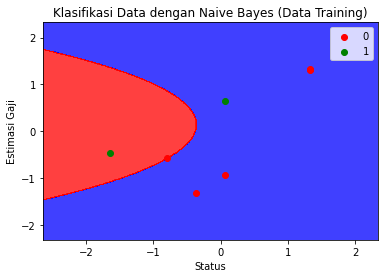

In [16]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha=0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Status')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


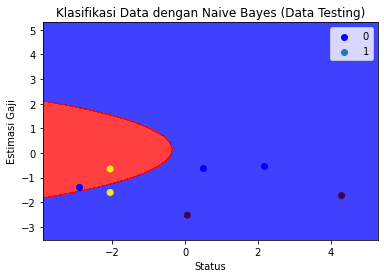

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha=0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Status')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()